In [1]:
from IPython.display import Markdown, display
display(Markdown(open("./SM_header.md", "r").read()))

Copyright © 2025-2026 Université Paris Cité

Author: [Guillaume Rousseau](https://www.linkedin.com/in/grouss/), Laboratoire Matières et Systèmes Complexes, UMR 7057, CNRS and Université Paris Cité, CNRS, UMR7057, 10 rue Alice Domon et Léonie Duquet, F-75013, Paris cedex 13, France (email: guillaume.rousseau@u-paris.fr)

This archive contains the supplemental materials and replication package associated with the preprint, "*Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation Datasets*", available on [arXiv](https://arxiv.org/abs/2501.10145) and [ssrn](http://ssrn.com/abstract=5191689).

**The latest version of the preprint (timestamped arXiv:2501.10145v5) is downloadable here https://arxiv.org/pdf/2501.10145**

The current version of the Python scripts and associated resources is available on the [author's GitHub page](https://github.com/grouss/growing-network-study).

This work is currently licensed under the [Creative Commons CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0).

To give appropriate credit and cite this work ([BibTeX entry](./rousseau2025temporal)):
Rousseau, G. (2025). *Empirical Growing Networks vs Minimal Models: Evidence and Challenges from Software Heritage and APS Citation
Datasets* [Preprint]. arXiv:2501.10145. https://arxiv.org/abs/2501.10145

 
# A) Replication Packages

[Open the Replication Package notebook related to the datasets.](./Replication_Package_Datasets.ipynb)

[Open the Replication Package notebook related to the figures.](./Replication_Package_Figures.ipynb)

# B) QuickStart Guide

[Open the QuickStart Guide notebook](./SM00_QuickStart.ipynb)

# C) Table of Contents

- 1. [Function Definitions](./SM01_Functions.ipynb)
- 2. [Dataset Import](./SM02_DatasetImport.ipynb)
- 3. [Building the Transposed Graph](./SM03_BuildingTransposedGraph.ipynb)
- 4. [Temporal Information Quality and Summary Statistics](./SM04_TemporalInformationMainStats.ipynb)
- 5. [Growth Relationship Between Nodes and Edges](./SM05_GrowingRules.ipynb)
- 6. [Topological Partitioning($RV$ Nodes)](./SM06_TopologicalPartitioning.ipynb)
- 7. [In-Degree and Out-Degree Distributions Over Time](./SM07_DegreeDistributionOverTime.ipynb)
- 8. [Distribution Tail Analysis](./SM08_DistributionTailAnalysis.ipynb)
- 9. [Temporal Partitioning](./SM09_TemporalPartitioning.ipynb)
- 10. [Building the temporal graph $O-(RV/RL)-O$](./SM10_DerivedGrowingNetwork.ipynb)
- 11. [Building the $TSL$ graph](./SM11_TSLPartitioning.ipynb)
- 12. [Price / Directed Barabási–Albert Model Use Case](./SM12_BarabasiAlbertUseCase.ipynb)
- 13. [APS citation network](./SM13_APSCitationNetwork.ipynb)
- 14. [Generic Report Template](./SM14_GenericReport.ipynb)


**NB :** As of 2026/01/31, the QuickStart guide, the replication packages, and SM01 to SM14 are available. The Python scripts are also provided under local_utils directory, but they are not in their final form and should be considered an alpha release.

The graphs used in the study are available in a distinct Zenodo Deposit 10.5281/zenodo.15260640 ($\sim50$ Go), including the main graph (2+ billions of nodes, $\sim4$ billions of edges), and two derived graphs ($\sim150$ millions nodes and edges).

The APS Citation Dataset (2022 export) has been included in the study.

More release notes are available in the [dedicated notebook](./SM_ReleaseNote.ipynb).

In [2]:
%load_ext autoreload
%autoreload 2

import importlib,sys,local_utils
from local_utils import *

print("___ Import data from graphpath=",config.graphpath)
print("___ Export data to exportpath=",config.exportpath)   

DisplayCopyrightInfo()


___ Import data from graphpath= ./ImportData/
___ Export data to exportpath= ./ExportData/
--------------------------------------------------------------------------------
Copyright 2025 Université Paris Cité, France 
Author: Guillaume Rousseau, MSC Lab, Physics Department, Paris, France 

(https://www.linkedin.com/in/grouss/)

This archive contains the supplemental materials and replication package associated with the preprint available on :
- arXiv (https://arxiv.org/abs/2501.10145)
- SSRN  (http://ssrn.com/abstract=5191689

Current version of python scripts and associated ressources are available on author's github page
(https://github.com/grouss/growing-network-study)

This work is currently licensed under CC BY-NC-SA 4.0
(https://creativecommons.org/licenses/by-nc-sa/4.0)
--------------------------------------------------------------------------------



---

# 5 Growth Relationship Between Nodes and Edges

In the most general case, it is necessary to analyze the distribution of the number of links created with each new node within a specified time interval. Initially, one can consider the number of new edges over a brief period, relative to the timescale of the network’s evolutionary properties (here, a month is appropriate). This involves calculating the average number of links per new node created during this interval.

## In the scope of this study

In the dataset studied, only $RV$ and $RL$ nodes, and  $RV{\to}RV$, $RL{\to}RL$, $RL{\to}RV$ edges have native timestamps. 

The following figure display the 4 possible combinaisons of edge creation rate (cumulated over one month) over nodes creation rate of the source or target node type.

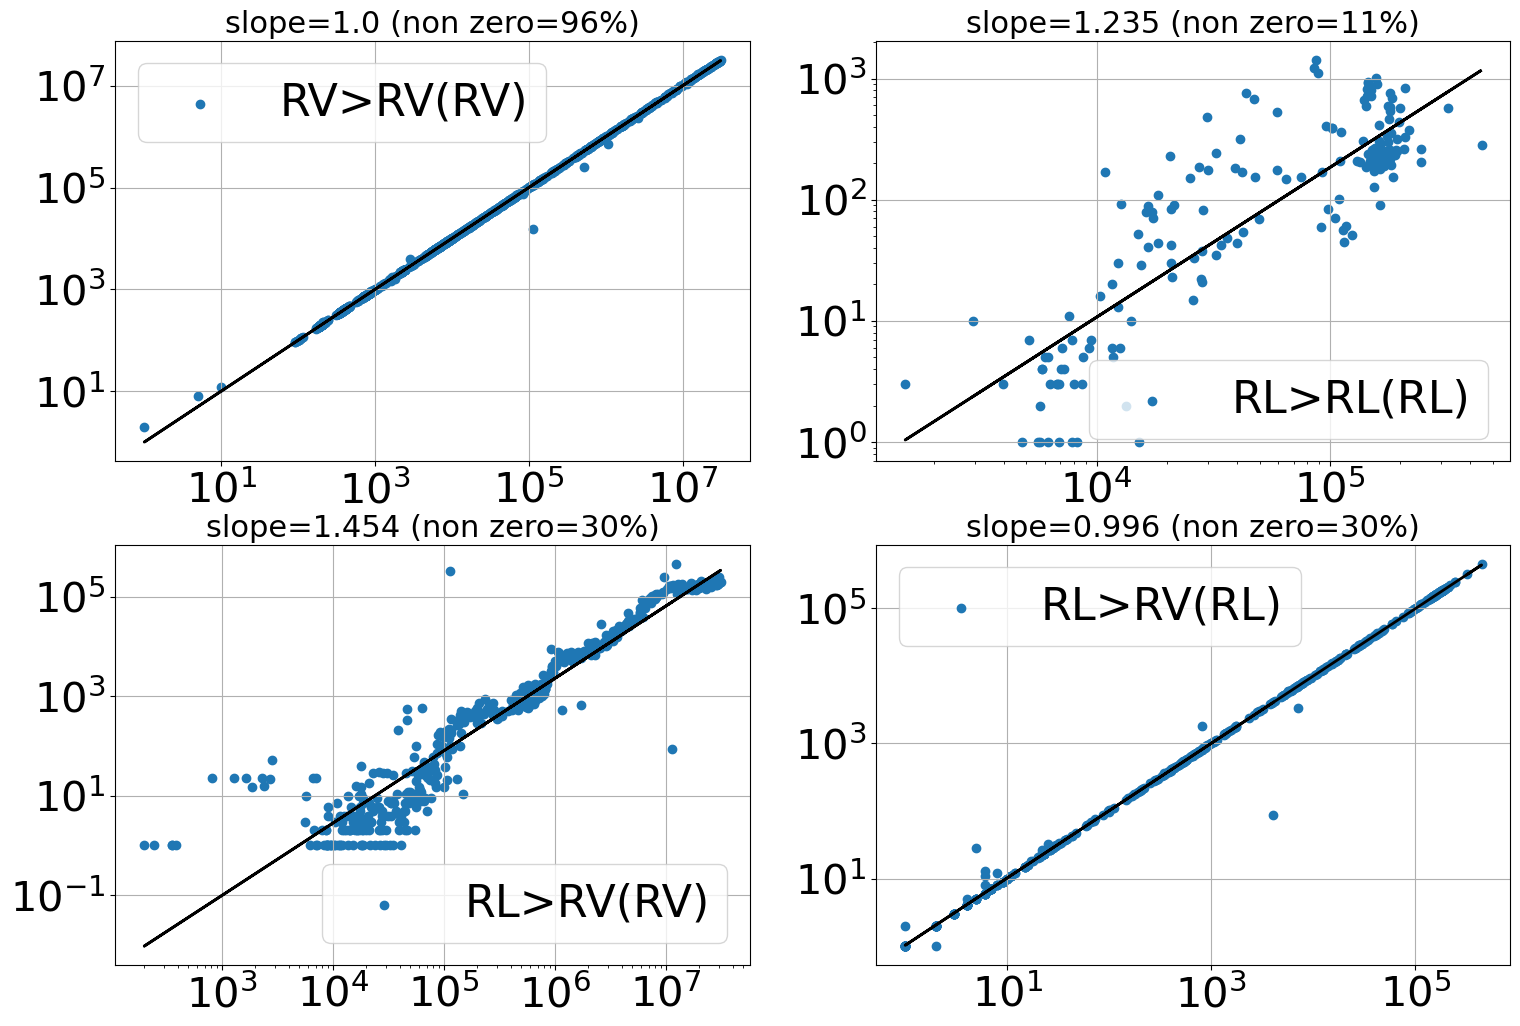

In [3]:

stat=pickle.load(open(exportpath+"stat_nodes_edges_1970_2030_20240517.pkl","rb"))

nfig=2

fontsize=FontSize[nfig]


fig, axs = plt.subplots(nfig,2,figsize=(18,6*nfig),sharex=False,sharey=False)   

for i,j,row,col in [
    (0,0,"RV>RV","RV"),
    (0,1,"RL>RL","RL"),
    (1,0,"RL>RV","RV"),
    (1,1,"RL>RV","RL"),
]:
        x=stat[col]
        y=stat[row]
        mask=np.logical_and(x>0,y>0) # only for months with at least one new node and one new edge
        params, params_covariance = curve_fit(power_law, x[mask],np.log(y[mask]),p0=[1, 1])

        axs[i,j].scatter(x[mask],y[mask],label=row+"("+col+")")
        axs[i,j].plot(x[mask],np.exp(power_law(x[mask], *params)),color="k",lw=2)
        axs[i,j].set_title("slope="+str(round(params[1],3))+" (non zero="+str(round(100*np.sum(mask)/len(mask)))+"%)",fontsize=fontsize-10)
        axs[i,j].set_yscale("log")
        axs[i,j].set_xscale("log")
        axs[i,j].grid()
        axs[i,j].legend(fontsize=fontsize)
        axs[i,j].tick_params(axis='both',which='major',labelsize=fontsize-2)


plt.show()

For a time period defined by a start month and an end month, we can display the histogram of the number of outgoing edges of new nodes that appeared during this interval (i.e., the histogram of the out-degrees for new nodes). For simplicity, we consider only the creation date of the source node associated with the author's date (see discussion in the article).

Since this date does not exist for origin node, and releases have a single outgout edges, we focus on revision node, at this point. We then display the complementary cumulated out degree distribution function ($ccdf(\delta_{out})$). It potentially include all type of edges, i.e. $RV{\to}RV$, $RV{\to}RL$, and $RV{\to}O$ even if only $RV{\to}RV$ edges can have a source node of type $RV$.

Loaded : ./ImportData/nodes_20240310.pkl
Loaded : ./ImportData/edges_20240310.pkl
Loaded : ./ImportData/nodesad_20240310.pkl
Loaded : ./ImportData/d_20240310.pkl
DatasetName SWH derived (O/RL/RV)-(RL/RV)
DatasetDescription Zenodo Deposit 10.5281/zenodo.15260640
DatasetDoi 10.5281/zenodo.15260640
From EPOCH 1970-01-01


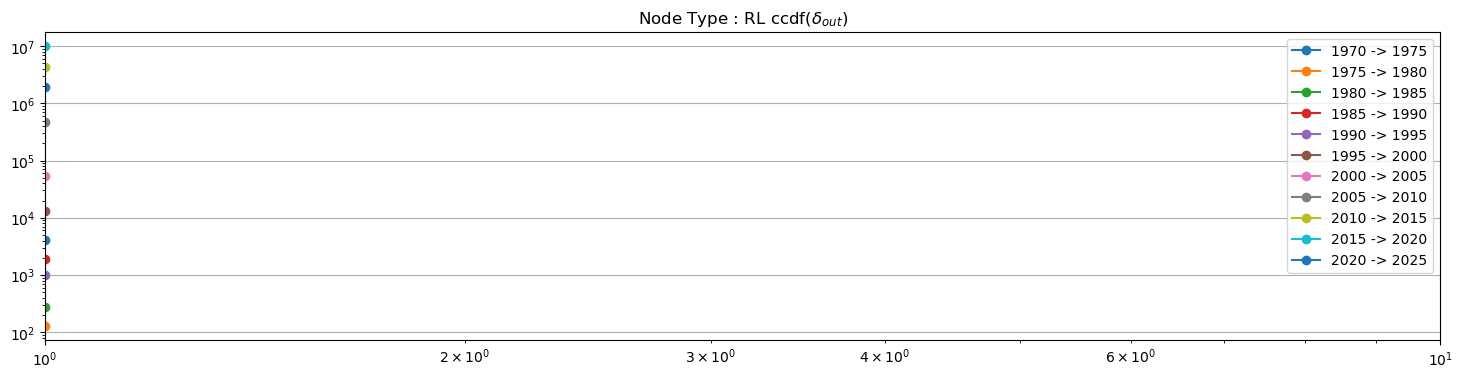

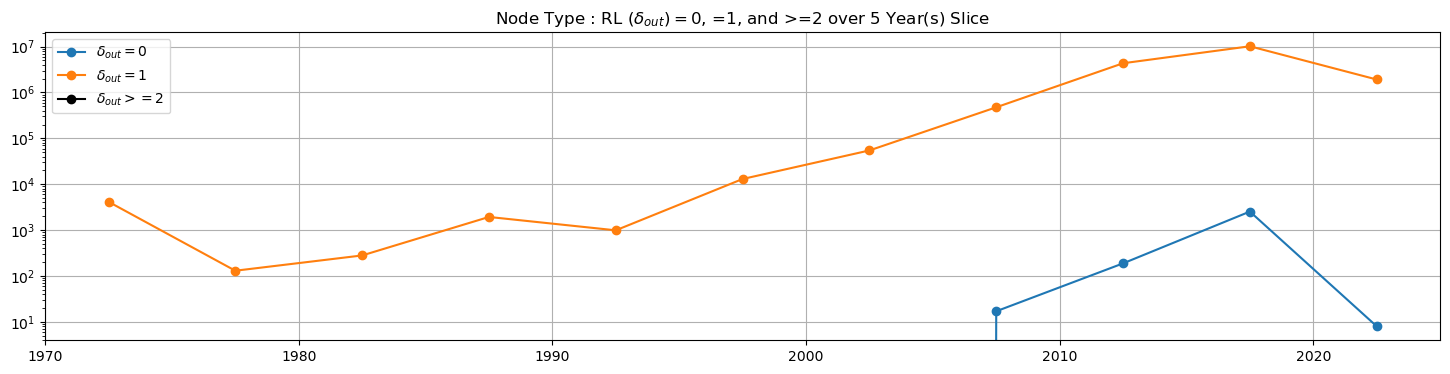

Node Type : RV RV>(*) (ONLY RV>RV edges exist in this study)


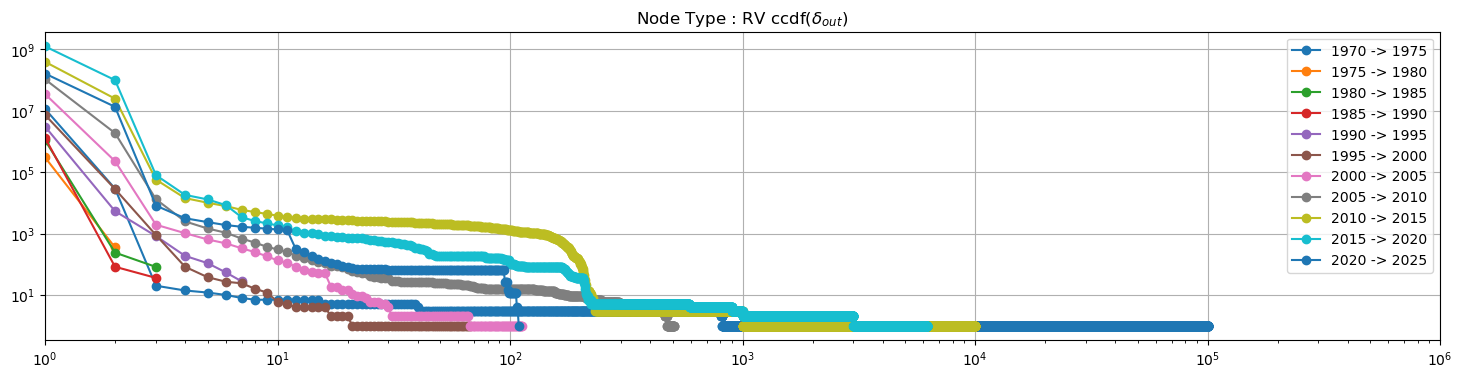

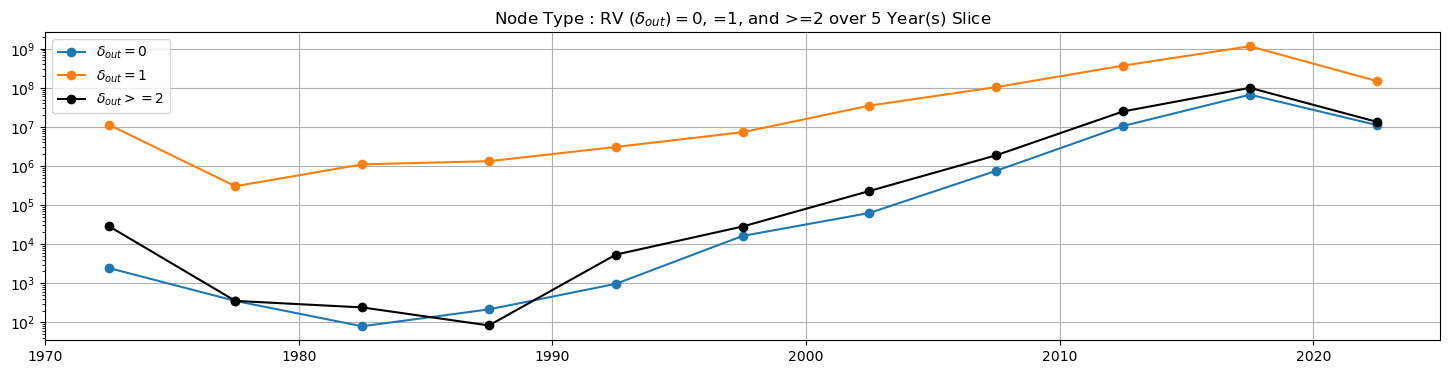

In [4]:

nodes,edges,nodesad,d,Nnodes,Nedges,EPOCH,DatasetName=LoadAllArray()   
arraytype,encoding=GetNodesTypesArray(nodes,edges,d=d)
degreeout=nodes[1:]-nodes[:-1]

YearSlice=5
dout={}
for indextype,nodeType in enumerate(encoding):
    mask_type=arraytype==indextype
    nodesadtype=nodesad[mask_type]
    degreeouttype=degreeout[mask_type]
    xlimmax=10**int(np.log10(np.max(degreeouttype))+1)
    if nodeType=="RV" or nodeType=="RL":
        if nodeType=="RV":
            print("Node Type :",nodeType,"RV>(*) (ONLY RV>RV edges exist in this study)")
        plt.figure(figsize=(18,4))
        plt.title('Node Type : '+nodeType+r' ccdf$(\delta_{out})$')
        for year in np.arange(1970,2021,YearSlice):
            lowerbound=datetime(year=year, month=1, day=1).replace(tzinfo=timezone.utc).timestamp()
            upperbound=datetime(year=year+YearSlice-1, month=12, day=31).replace(tzinfo=timezone.utc).timestamp()
            upperbound=np.uint32(upperbound)
            lowerbound=np.uint32(lowerbound)
            maskTS=np.logical_and(nodesadtype>=lowerbound,nodesadtype<=upperbound)
            if np.sum(maskTS)!=0:
                y=np.bincount(degreeouttype[maskTS])
                if nodeType not in dout:
                    dout[nodeType]={"x":[],"y2+":[],"y1":[],"y0":[]}
                dout[nodeType]["x"].append(year+YearSlice/2)    
                try:
                    dout[nodeType]["y2+"].append(np.sum(y[2:]))
                except:
                    dout[nodeType]["y2+"].append(0)
                try:
                    dout[nodeType]["y1"].append(y[1])
                except:
                    dout[nodeType]["y1"].append(0)
                try:
                    dout[nodeType]["y0"].append(y[0])
                except:
                    dout[nodeType]["y0"].append(0)
             
       
                    
                plt.plot(np.arange(len(y)),np.cumsum(y[::-1])[::-1],"o-",label=str(year)+' -> '+str(year+YearSlice))
        plt.xscale('log')
        plt.yscale('log')
        plt.xlim(1,xlimmax)
        plt.legend()
        plt.grid()
        plt.show()
        plt.figure(figsize=(18,4))
        plt.title('Node Type : '+nodeType+r' $(\delta_{out})=0$, =1, and >=2 over '+str(YearSlice)+' Year(s) Slice')
        plt.plot(dout[nodeType]["x"],dout[nodeType]["y0"],"o-",label=r'$\delta_{out}=0$')
        plt.plot(dout[nodeType]["x"],dout[nodeType]["y1"],"o-",label=r'$\delta_{out}=1$')
        plt.plot(dout[nodeType]["x"],dout[nodeType]["y2+"],"o-k",label=r'$\delta_{out}>=2$')
        plt.yscale('log')
        #plt.xlim(1,xlimmax)
        plt.legend()
        plt.grid()
        plt.show()
        

del nodes,edges

**Comment :** This graph shows that new release nodes have one or zero edges (zero edge being the exception). Situation for revision nodes is more complex, with 0, 1 or more edges showing different growing regime for nodes with different $\delta_{out}$, and need further investigation before comparison to minimal models of growing network. 

Since in this derived graph, revision nodes can only have outgoing edges toward (target) revision nodes, we will later study the convolution effect of the distribution associated with different types of edges.
